In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from ml.tools.generate import generate_basorexia_data
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [35]:
data = generate_basorexia_data(20)
print(data)
target = [d.pop("drug") for d in data]
target = [ord(t) - 65 for t in target]
print(target)

[{'age': 65, 'sex': 'M', 'BP': 'normal', 'cholestrol': 'low', 'Na': 0.8353510828121095, 'K': 0.2335099516957232, 'drug': 'D'}, {'age': 27, 'sex': 'F', 'BP': 'low', 'cholestrol': 'high', 'Na': 0.03589708832138083, 'K': 0.6161041792687213, 'drug': 'B'}, {'age': 46, 'sex': 'M', 'BP': 'low', 'cholestrol': 'low', 'Na': 0.6752880279338331, 'K': 0.3971954686828003, 'drug': 'D'}, {'age': 20, 'sex': 'M', 'BP': 'normal', 'cholestrol': 'high', 'Na': 0.76565747393754, 'K': 0.6012307197464407, 'drug': 'B'}, {'age': 61, 'sex': 'F', 'BP': 'low', 'cholestrol': 'normal', 'Na': 0.9860428971471017, 'K': 0.31913173414178897, 'drug': 'D'}, {'age': 85, 'sex': 'M', 'BP': 'normal', 'cholestrol': 'low', 'Na': 0.09152058336317848, 'K': 0.47874950545022177, 'drug': 'D'}, {'age': 85, 'sex': 'F', 'BP': 'high', 'cholestrol': 'low', 'Na': 0.6712448421267955, 'K': 0.1805589336644371, 'drug': 'B'}, {'age': 73, 'sex': 'M', 'BP': 'high', 'cholestrol': 'high', 'Na': 0.21790649823949892, 'K': 0.721200838225303, 'drug': 'C

In [36]:
sodium = [d.get("Na") for d in data]
posassium = [d.get("K") for d in data]
age =  [d.get("age") for d in data]

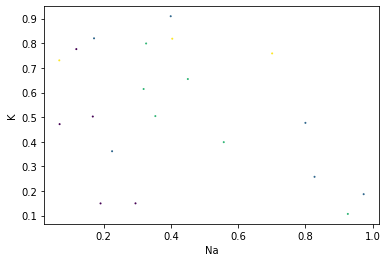

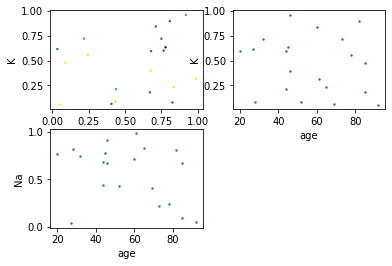

In [37]:
plt.subplot(221)
plt.scatter(sodium, posassium,c=target, s=2)
plt.xlabel("Na")
plt.ylabel("K")

plt.subplot(222)
plt.scatter(age, posassium, s=2)
plt.xlabel("age")
plt.ylabel("K")

plt.subplot(223)
plt.scatter(age, sodium, s=2)
plt.xlabel("age")
plt.ylabel("Na")
plt.show()

In [40]:
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data_pre, target, train_size=0.9)

In [69]:
dc = DecisionTreeClassifier(max_depth=10)
dc.fit(X_train, y_train)
print(dc.score(X_test, y_test))

0.5


['BP=high', 'BP=low', 'BP=normal', 'K', 'Na', 'age', 'cholestrol=high', 'cholestrol=low', 'cholestrol=normal', 'sex=F', 'sex=M']
[0.         0.         0.08910891 0.49653465 0.23019802 0.
 0.         0.         0.         0.         0.18415842]


<BarContainer object of 11 artists>

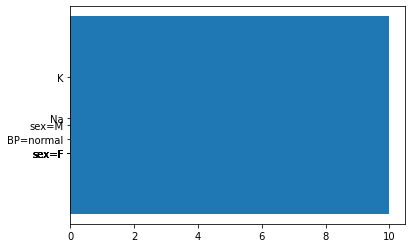

In [62]:
# with open('D:/test/a.dot', 'w') as f:
#     export_graphviz(dc, out_file=f)
print(vec.get_feature_names())
print(dc.feature_importances_)
plt.barh(width=10, y = dc.feature_importances_, tick_label = vec.get_feature_names())